In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

# The Game of Frogger

## The game of Frogger is a simple game where a frog starts at one side of a stream and tries to get to the other side of the stream. The stream has within it N lily pads. The frog starts, effectively, on pad 0 and can jump to pad 1, 2, 3, ..., N+1. The frog is equally likely to jump to any of the pads 1, 2, 3, ..., N+1.  The frog gets to the other side when she reaches pad N+1.

## The question is, on average, how many jumps does it take for the frog to get to the other side of the stream?


## Analytic Solution

### The expectation value for a discrete random variable is defined as:

### $E = \sum_{i=0}^{n} x_i p_i$

### where $x_i$ is the value of the random variable and $p_i$ is the probability of the random variable taking on the value $x_i$.

### Let's consider some simple cases:

### n = 0

### $E_0 = x_0 p_0 = 1 \cdot 1 = 1$

### n = 1

### $E_1 = \frac{1}{2} (1) + \frac{1}{2} (2) = 1 + \frac{1}{2} (1) = \frac{3}{2}$ = 1.5

### n = 2

### $E_2 = \frac{1}{3} (1) + \frac{1}{3} (\frac{1}{2} (2) + \frac{1}{2} (3)) + \frac{1}{3} (2)  = 1 + \frac{1}{3} (\frac{3}{2}) + \frac{1}{3} (1) = \frac{11}{6} = 1.8333$

### We can observe a pattern now ... for each value of $n$, we can break down the problem into a sum of the previous problems (for smaller n values).  We see that for any value of n, the expectation value is:

### $E_n = 1 + \frac{1}{n+1} \sum_{i=1}^{n} E_{n-i}$

### So, we can calculate the expectation value for any value of n by calculating the expectation value for all smaller values of n.  A recursive solution to this problem seems appropriate.



### Set the number of lilypads

In [38]:
n = 5

### seed the random number generator

In [39]:
random.seed(1)

In [49]:
start = 0 # start at lilypad 0
jumpsum = 0 # keep track of the number of jumps per simulation
total_jumps = 0 # keep track of the total number of jumps for all simulations
n_trys = 1000 # number of simulations to run

x = [] # array for the number of lilypads for plotting
y = [] # array for the expectation value for plotting
eval = [] # array for the analytic solution
evalr2 = [] # array for the analytic solution
evalr3 = [] # array for the analytic solution
sigma = [] # array for the error on the expectation value

In [50]:
# loop over the number of lilypads (it's n+1 so that we actually do the n=1000 case)
for npad in range(0,n+1): 

    if (npad == 0):
        eval.append(1)
    else:
        sum = 1.0
        for i in range(0,npad):
            #print(i,npad,npad-i)
            #print(eval[npad-i-1])
            sum = sum + 1.0/(npad+1)*(eval[npad-i-1])
        eval.append(sum)
    print("Theory: ",npad,eval[npad])
  

Theory:  0 1
Theory:  1 1.5
Theory:  2 1.8333333333333333
Theory:  3 2.083333333333333
Theory:  4 2.283333333333333
Theory:  5 2.4499999999999997


In [51]:
for npad in range(0,n+1):
    
    x.append(npad+1)
    
    sum2 = 1.0/stats.hmean(x)*(npad+1)
    evalr3.append(sum2)
    
    print (npad,sum2)
    
    end = npad+1
    for j in range(n_trys):
        while start < npad+1:
            jump = int(random.uniform(1,(end-start)))
            #print ("Jump = ",jump)
            start = start + jump
            #print ("Now at ",start)
            jumpsum = jumpsum + 1
        start = 0
        #print ("j = %d, Total_jumps = %d" % (j,jumpsum))
        total_jumps = total_jumps + jumpsum
        jumpsum = 0
    
    #print (npad,total_jumps,n_trys)

    expectation_value = total_jumps/n_trys*1.0
    y.append(expectation_value)
    sigma.append(expectation_value*1/np.sqrt(n_trys))
    total_jumps = 0
    
    print ("Expectation value for n = %d is %f" % (npad,expectation_value))
  

0 1.0
Expectation value for n = 0 is 1.000000
1 1.5
Expectation value for n = 1 is 2.000000
2 1.833333333333333
Expectation value for n = 2 is 2.497000
3 2.083333333333333
Expectation value for n = 3 is 2.833000
4 2.283333333333333
Expectation value for n = 4 is 3.090000
5 2.4499999999999997
Expectation value for n = 5 is 3.302000


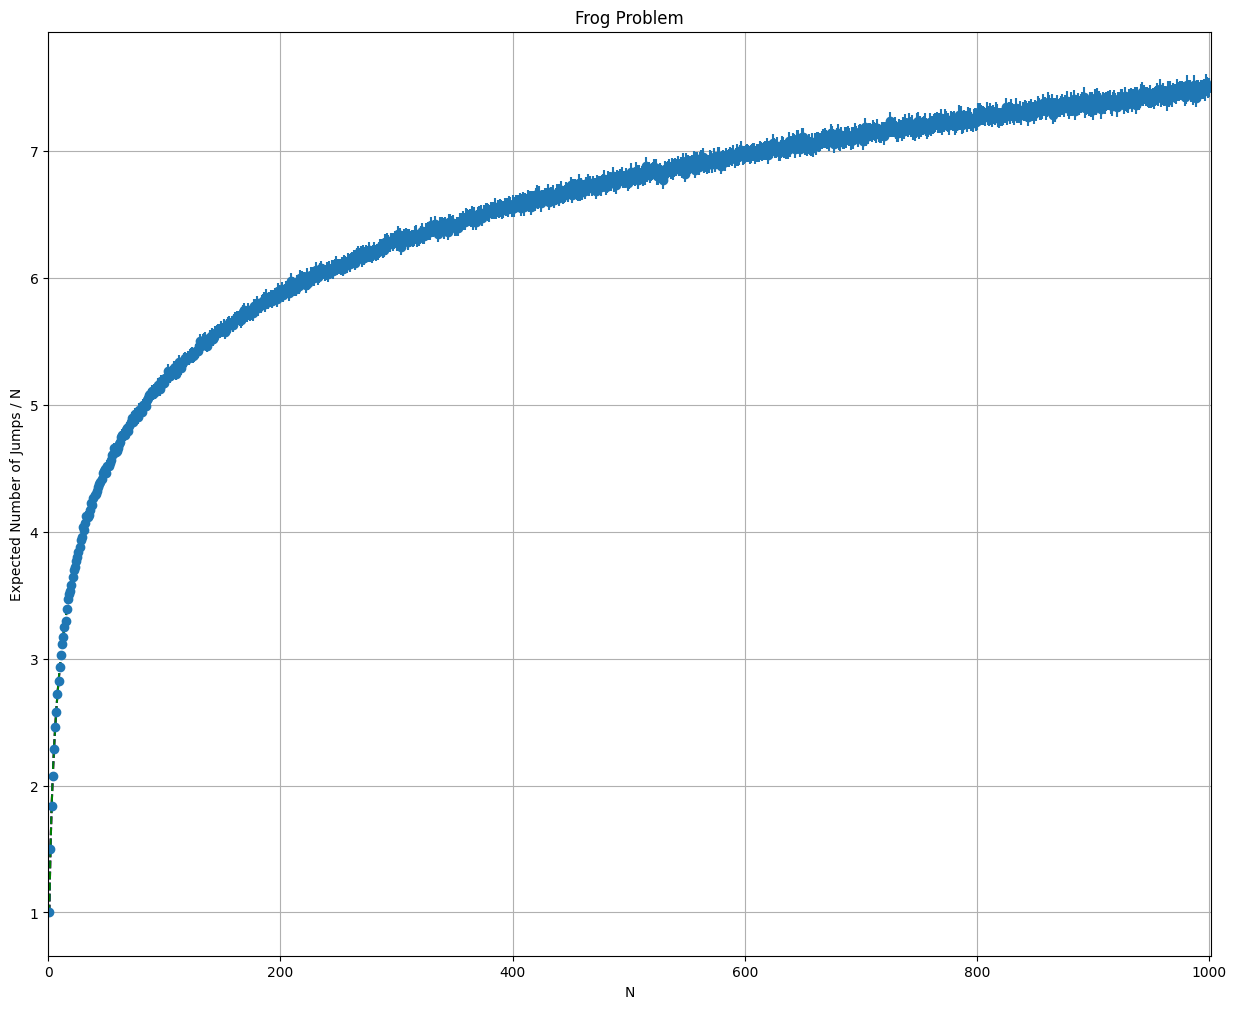

In [6]:
def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x+paramlist[2]*x*x+paramlist[3]*x*x*x


fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

ax1.set_title("Frog Problem")
ax1.set_xlabel('N')
ax1.set_ylabel('Expected Number of Jumps / N')
ax1.set_xlim(0,n+1)
#ax1.set_yscale("log")
#ax1.set_xscale("log")
ax1.grid(True)

ax1.errorbar(x,y,yerr=sigma,fmt='o')
ax1.plot(x,evalr,'r--')
ax1.plot(x,evalr2,'b--')
ax1.plot(x,evalr3,'g--')
